In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
from pandas import DataFrame
import sklearn
from sklearn import model_selection
import pickle

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df['Result'].unique()

array([-1,  1], dtype=int64)

In [5]:
#Here 1 = phishing and -1 = Legitimate

In [8]:
df.shape

(11055, 32)

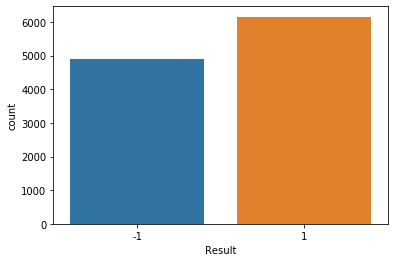

In [9]:
import seaborn as sns
sns.countplot(df['Result'])

In [10]:
#Unique values for each columns
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [11]:
#Replacing -1 with 0 as we will do binary classification
df['Result']=df['Result'].replace(-1,0)

In [12]:
df.shape

(11055, 32)

In [13]:
# Print correlation pf features with target variable
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [ ]:
#!/usr/bin/python

import time

def calculate_metrics(y_test,Y_predicted):

    from sklearn import metrics
    from sklearn.metrics import classification_report,confusion_matrix

    accuracy = metrics.accuracy_score(y_test,Y_predicted)
    #print "accuracy = "+str(round(accuracy * 100,2))+"%"

    confusion_mat = confusion_matrix(y_test,Y_predicted)

    print("Confusion Matrix: ")
    print(confusion_mat)
    print("Confusion Matrix Shape: ", confusion_mat.shape)

    print("TP\tFP\tFN\tTN\tSensitivity\tSpecificity")
    for i in range(confusion_mat.shape[0]):
        TP = round(float(confusion_mat[i,i]),2)  # correctly labeled as i
        FP = round(float(confusion_mat[:,i].sum()),2) - TP  # incorrectly labeled as i
        FN = round(float(confusion_mat[i,:].sum()),2) - TP  # incorrectly labeled as non-i
        TN = round(float(confusion_mat.sum().sum()),2) - TP - FP - FN
        print(str(TP)+"\t"+str(FP)+"\t"+str(FN)+"\t"+str(TN)),
        sensitivity = round(TP / (TP + FN),2)
        specificity = round(TN / (TN + FP),2)
        print("Sensitivity: "+str(sensitivity))
        print("Specificity: "+str(specificity))


    f_score = metrics.f1_score(y_test,Y_predicted)
    print("The F1 score: ", f_score)
    print("Accuracy: ", accuracy)
    

def neural_network(dataset,class_labels,test_size):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.neural_network import MLPClassifier
    X = pd.read_csv(dataset)
    Y = pd.read_csv(class_labels)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_size, random_state=42) 
    model = MLPClassifier(hidden_layer_sizes=(100), activation='logistic',random_state = 42)
    model.fit(X_train,y_train)
    Y_predicted = model.predict(X_test)
    
    
    return y_test,Y_predicted


def random_forests(dataset,class_labels,test_size):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    X = pd.read_csv(dataset)
    Y = pd.read_csv(class_labels)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_size, random_state=42)   
    model = RandomForestClassifier(n_estimators = 5, criterion = 'entropy',random_state = 42)
    model.fit(X_train,y_train)
    filename = 'finalized_model.pkl'
    pickle.dump(model, open(filename, 'wb'))
    Y_predicted = model.predict(X_test)
    return y_test,Y_predicted

def support_vector_machines(dataset,class_labels,test_size):
    import numpy as np
    from sklearn import svm
    import pandas as pd
    from sklearn.model_selection import train_test_split
    X = pd.read_csv(dataset)
    Y = pd.read_csv(class_labels)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_size, random_state=42)  
    # 'rbf' value is the gaussian kernel, 'C' is the coefficient used for regularization during training
    model = svm.SVC(kernel='rbf',C=2.0)
    model.fit(X_train,y_train)
    Y_predicted = model.predict(X_test)
    return y_test,Y_predicted

def main():

    dataset = "dataset2.csv"
    class_labels = "target_labels.csv"
    test_size = 0.3
    print("\nrunning neural networks...")
    start_time = time.time()
    y_test,Y_predicted = neural_network(dataset,class_labels,test_size)
    calculate_metrics(y_test,Y_predicted)
    end_time = time.time()
    print("runtime = "+str(end_time - start_time)+" seconds")
    print("\nrunning random forests...")
    start_time = time.time()
    y_test,Y_predicted = random_forests(dataset,class_labels,test_size)
    calculate_metrics(y_test,Y_predicted)
    end_time = time.time()
    print("runtime = "+str(end_time - start_time)+" seconds")

    print("\nrunning support vector machines...")
    start_time = time.time()
    y_test,Y_predicted = support_vector_machines(dataset,class_labels,test_size)
    calculate_metrics(y_test,Y_predicted)
    end_time = time.time()
    print("runtime = "+str(end_time - start_time)+" seconds")


if __name__ == '__main__':
    start_time = time.time()
    main()
    end_time = time.time()
    print("runtime = "+str(end_time - start_time)+" seconds")


running neural networks...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
